#### **Optimizing Inventory and Sales Strategies in the Video Game Industry**
In this project, we aim to help developers, publishers, and distributors optimize their sales strategy, increase customer reach, and boost revenue.

Using Python for data analysis and visualization, this project will:
- Explore historical sales data to identify trends and patterns.
- Develop actionable strategies to improve inventory performance and boost sales.

In [ ]:
# Import libraries

import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from clean import process_dataframe
from create_db import create_database
from sql_analysis import run_sql_queries
# from analysis import analyze_data

In [6]:
# Step 1: Load the datasets and convert to them to DataFrames
sales = './vgsales.csv'
metadata = './games.csv'

def read_csv_file(file_path):

    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist.")
        return None
    
    df = pd.read_csv(file_path)
    return df

df_sales = read_csv_file(sales)
df_metadata = read_csv_file(metadata)

In [7]:
# Step 2: Clean the data
df_sales = process_dataframe(df_sales)
df_metadata = process_dataframe(df_metadata)

In [8]:
# Step 3: Create SQL database
db_file_path = create_database(df_sales, df_metadata)

At this point we start the analyzation process by examining SQL query results.

In [10]:
# Connect to the database
def connect_to_db(db):

    if not os.path.exists(db):
        print(f"Database '{db}' does not exist.")
        return None
        
    return sqlite3.connect(db)

conn = connect_to_db('videogames.db')
cursor = conn.cursor()

In [ ]:
# Let's compare the relationship between total games released and total sales by publisher
rows = cursor.execute('''
    SELECT 
        publisher, 
        COUNT(*) AS games_count,
        SUM(global_sales) AS total_sales
    FROM sales
    GROUP BY publisher
    ORDER BY total_sales DESC
    LIMIT 10;              
''')

games_sales_ratio = pd.DataFrame(rows, columns=['Publisher', 'Game Count', 'Total Sales'])
print(games_sales_ratio)

# As we can observe from the top 20 most successful game publishers, quantity 

                      Publisher  Game Count  Total Sales
0                      Nintendo         706      2084.27
1               Electronic Arts        1342      1119.86
2                    Activision         965       785.81
3   Sony Computer Entertainment         682       607.28
4          Take-Two Interactive         412       552.30
5                       Ubisoft         917       473.53
6                           THQ         712       340.44
7            Namco Bandai Games         933       333.82
8                        Mojang           6       279.02
9  Konami Digital Entertainment         823       278.56


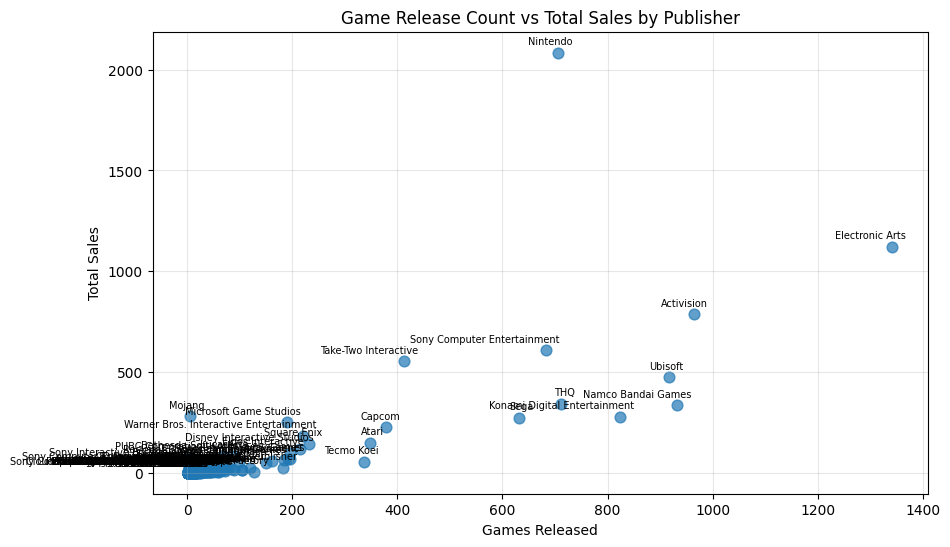

In [12]:
# A dot chart can best visualize this relationship.
publisher_stats = df_sales.groupby('publisher').agg(
    game_count=('title', 'count'),
    total_sales=('global_sales', 'sum')
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    publisher_stats['game_count'], 
    publisher_stats['total_sales'], 
    alpha=0.7, 
    s=60, 
    label="Publisher"
)

x_offset = (publisher_stats['game_count'].max() - publisher_stats['game_count'].min()) * 0.02
y_offset = (publisher_stats['total_sales'].max() - publisher_stats['total_sales'].min()) * 0.02

# Add labels
for i, row in publisher_stats.iterrows():
    plt.text(
        row['game_count'] + x_offset, 
        row['total_sales'] + y_offset,
        row['publisher'], 
        fontsize=7, 
        ha='right'
    )

# Chart aesthetics
plt.title('Game Release Count vs Total Sales by Publisher')
plt.xlabel('Games Released')
plt.ylabel('Total Sales')
plt.grid(alpha=0.3)
plt.show()


Like most entertainment industries, quality is more important than quantity. This is not to say that quantity doesn't matter. Look at Electronic Arts, with over 1,300 unqiue games, their sales are 2nd highest, but statistically compared to other publishers, their sales should be much higher. For example, Nintendo has almost HALF as many games as Electronic Arts, but double the sales. Most publishers have a predictable game count to sales ratio, but of course, there are outliers. When publishers consistently produce quality, influential games, quantity has less of an effect on total sales.